
**Title of ML project: INCOME LEVEL CLASSIFICATION PREDICTIONS**

**Name:** JUBIN K. BABU.

**Organization:** Entri Elevate

**Date:** [Evaluation Date]

#1.Overview of Problem Statement


The ML project aims to predict whether an individual’s income is above or below $50K using the Census Income Dataset from UCI. The dataset includes demographic and work-related features like age, education, occupation, work hours, and capital gain/loss. The workflow involves data collection,taking basic details of data,data preprocessing, exploratory data analysis (EDA), model training using classification algorithms (Logistic Regression, Decision Trees, Random Forest,GradientBoosting etc...) and performance evaluation. The best-performing model will be optimized and deployed for practical use. This project provides insights into income disparity factors and can be useful in HR analytics, financial planning, and policy-making

# 2.Objective


Develop a machine learning model to predict whether an individual earns more than $50K per year based on demographic and employment-related attributes from the UCI Census Income dataset. This model can be useful for socioeconomic analysis, government policy planning, and targeted financial services.

#3.Data Description

[UCI Census Income dataset (also known as "Adult" dataset)]

Features: [age,workclass,fnlwgt,education,education-num,marital-status, occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week, native-country,income]

**Importing Necesscary Libraries**

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import joblib
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score, roc_curve, auc,confusion_matrix
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report



#4.Data Collection

In [45]:
#  Defining column names based on dataset
columns = ["age", "workclass", "fnlwgt", "education", "education-num",
           "marital-status", "occupation", "relationship", "race", "sex",
           "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"]

# Load the .data and .test files into DataFrames
df_train = pd.read_csv("/content/adult.data", names=columns, skipinitialspace=True)
df_test = pd.read_csv("/content/adult.test", names=columns, skipinitialspace=True, skiprows=1)

# Display first 6 rows
df_train.head()
df_test.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


**CONVERTING TO DATAFRAME**

In [46]:
# Concatenate the training and testing datasets
df = pd.concat([df_train, df_test], axis=0)

# Reset the index of the combined DataFrame
df = df.reset_index(drop=True)
df.head()


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [47]:
df.sample(5) #To take the random rows in the dataframe as sample

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
5285,31,Self-emp-inc,236415,Some-college,10,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,20,United-States,>50K
6954,47,Local-gov,121124,Masters,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,35,United-States,>50K
16575,22,Private,242912,HS-grad,9,Never-married,Other-service,Unmarried,White,Female,0,0,35,United-States,<=50K
26753,44,Private,115411,Some-college,10,Divorced,Machine-op-inspct,Not-in-family,White,Male,0,0,40,United-States,<=50K
29216,28,Private,180007,Some-college,10,Never-married,Handlers-cleaners,Own-child,White,Male,0,0,40,United-States,<=50K


Above is the sample rows printed in which it has "?" as the element.

In [48]:
df.replace("?",np.nan,inplace=True)

There are so many columns which has "?" as an element,So I replaced it with nan value and then handled it with necesscary imputation

In [49]:
df.sample(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
14496,36,Private,168826,10th,6,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,United-States,<=50K
25414,49,Self-emp-not-inc,219718,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,15024,0,40,United-States,>50K
13838,22,State-gov,134192,Some-college,10,Never-married,Tech-support,Own-child,White,Female,0,0,10,United-States,<=50K
45435,39,Private,161295,Assoc-acdm,12,Divorced,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,>50K.
6642,46,Private,353824,Assoc-acdm,12,Never-married,Adm-clerical,Not-in-family,White,Male,0,0,40,United-States,<=50K
43460,22,Private,225531,HS-grad,9,Never-married,Other-service,Own-child,White,Male,0,2205,40,United-States,<=50K.
18421,19,Local-gov,210308,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,1721,30,United-States,<=50K
42006,34,Private,256362,HS-grad,9,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,Italy,>50K.
41141,55,Local-gov,104996,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,15,United-States,<=50K.
8753,31,Private,374833,1st-4th,2,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,40,Mexico,<=50K


Above is the sample rows printed in which it has no "?".

 # Basic info about the dataset

In [50]:
df.shape

(48842, 15)

 Above tuple represnts the number of instances and the features.

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       46043 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      46033 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  47985 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [52]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


The dataset represents a working-age population (mostly 28–48 years old).

Most people have high school-level education.

Only a few have significant capital gains/losses.

The standard workweek is around 40 hours, but some work extremely high or low hours.

# 5.Data Preprocessing

In [53]:
df.isnull().sum()

,0
age,0
workclass,2799
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,2809
relationship,0
race,0
sex,0


There are so many null values in certian columns like "workclass","occupation,"native-country",So we need to remove these.

In [54]:
df.isnull().sum()/100 #to get the percentage of null values in each column.

,0
age,0.00
workclass,27.99
fnlwgt,0.00
education,0.00
education-num,0.00
marital-status,0.00
occupation,28.09
relationship,0.00
race,0.00
sex,0.00


The above metrices represents the percentage of null values an found that workclass has 27.99%,occupation has 28.09% and native country has 8.57% null values.

**Separating numerical and categorical columns**

In [55]:
num_cols=df.select_dtypes(include="number").columns
num_cols


Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')

In [56]:
cat_cols=df.select_dtypes(include="object").columns
cat_cols

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country', 'income'],
      dtype='object')

**Imputation of null values**

In [57]:
imputer = SimpleImputer(strategy='most_frequent')
df[cat_cols] = imputer.fit_transform(df[cat_cols])

The above uses mode impuatation strategy for imputing null values in the  categorical columns.

In [58]:
df.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0
sex,0


In [59]:
df.duplicated().sum()

np.int64(29)

We found that there are 29 duplicate rows,So we need to handle it by drop_duplicates method below.

In [60]:
df.drop_duplicates(inplace=True)
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [61]:
df.shape

(48813, 15)

In [62]:
df["income"].unique()

array(['<=50K', '>50K', '<=50K.', '>50K.'], dtype=object)

We found that there are four different classes but it originally representing only two classes, this happened due to typo, So we replaced it in below cell with appropriate values.

In [63]:
# Replace income values
df["income"] = df["income"].replace({"<=50K.": "<50K", "<=50K": "<50K",">50K.": ">50K"})
df["income"].value_counts()
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<50K
48838,64,Private,321403,HS-grad,9,Widowed,Prof-specialty,Other-relative,Black,Male,0,0,40,United-States,<50K
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<50K
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<50K


Again rechecking the value counts

In [64]:
df["income"].value_counts()


,count
income,
<50K,37128
>50K,11685


In [65]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48813.000000,4.881300e+04,48813.000000,48813.000000,48813.000000,48813.000000
mean,38.647348,1.896679e+05,10.078688,1079.708705,87.554299,40.425051
std,13.709005,1.056062e+05,2.570257,7454.185982,403.118605,12.390954
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175550e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781400e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376200e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


**Checking the skewness**

In [66]:
df.select_dtypes(include="number").skew()

,0
age,0.556775
fnlwgt,1.439534
education-num,-0.315007
capital-gain,11.891093
capital-loss,4.568263
hours-per-week,0.239643


Here we found that the most outliers are  present in the columns "capital-loss" and capital-gain", and other columns like ("age","hours-per-week","education-num") have only minimal outliers which can be neglected.So we need to remove outliers of ("capital-gain","capital-loss","fnlwgt") columns.

<Axes: >

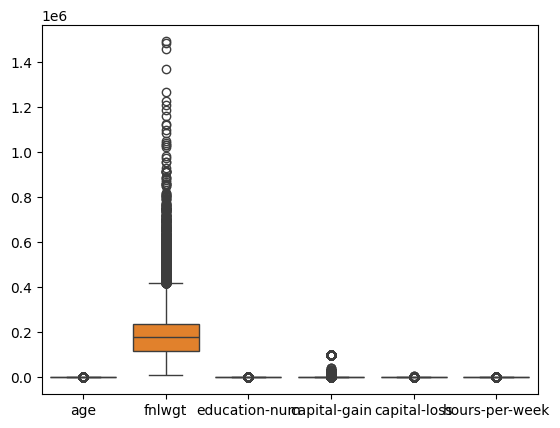

In [67]:
sns.boxplot(df)


We plotted this boxplot to get a rough idea about the outliers in each columns so we can visualize the amount.And this shows that "fnlwgt" has so many outliers.So We remove this outlier using Capping by IQR method.

**Capping Outliers using IQR method**

In [68]:
#Creating a user-defined function for capping the outliers
import numpy as np
def cap_outliers(df, columns):
    df_capped = df.copy()
    for col in columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        df_capped[col] = np.where(df_capped[col] < lower_bound, lower_bound, df_capped[col])
        df_capped[col] = np.where(df_capped[col] > upper_bound, upper_bound, df_capped[col])
    return df_capped



So above we created a user defined function for Capping method usinf IQR strategy.And then applied to  the numerical columns of this dataframe.

In [69]:
df_capped = cap_outliers(df, num_cols)
df_capped

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39.0,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<50K
1,50.0,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,32.5,United-States,<50K
2,38.0,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<50K
3,53.0,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<50K
4,28.0,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39.0,Private,215419.0,Bachelors,13.0,Divorced,Prof-specialty,Not-in-family,White,Female,0.0,0.0,36.0,United-States,<50K
48838,64.0,Private,321403.0,HS-grad,9.0,Widowed,Prof-specialty,Other-relative,Black,Male,0.0,0.0,40.0,United-States,<50K
48839,38.0,Private,374983.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,50.0,United-States,<50K
48840,44.0,Private,83891.0,Bachelors,13.0,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,0.0,0.0,40.0,United-States,<50K


In [70]:
df_capped.select_dtypes(include="number").skew()

,0
age,0.515425
fnlwgt,0.555153
education-num,-0.035090
capital-gain,0.000000
capital-loss,0.000000
hours-per-week,0.439390


Above we again rechecked fo the outliers and found that it is mostly removed those.

In [71]:
# Apply Log Transformation
df_capped["capital-gain"] = np.log1p(df_capped["capital-gain"])
df_capped["capital-loss"] = np.log1p(df_capped["capital-loss"])


<Axes: >

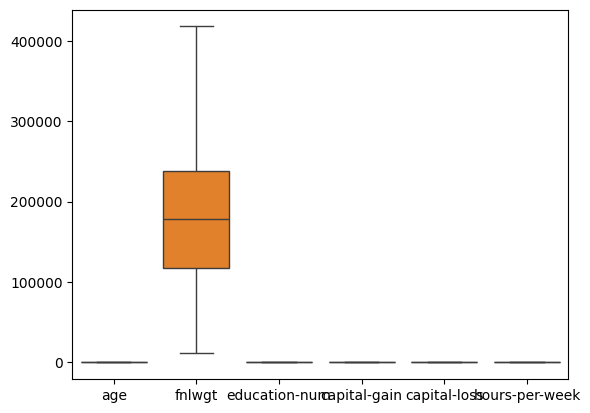

In [72]:
sns.boxplot(df_capped)

Above again we plotted the boxplot and found that all outliers are removed.

# 6.Exploratory Data Analysis(EDA)

**Histogram to check the skewness**

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'fnlwgt'}>],
       [<Axes: title={'center': 'education-num'}>,
        <Axes: title={'center': 'capital-gain'}>],
       [<Axes: title={'center': 'capital-loss'}>,
        <Axes: title={'center': 'hours-per-week'}>]], dtype=object)

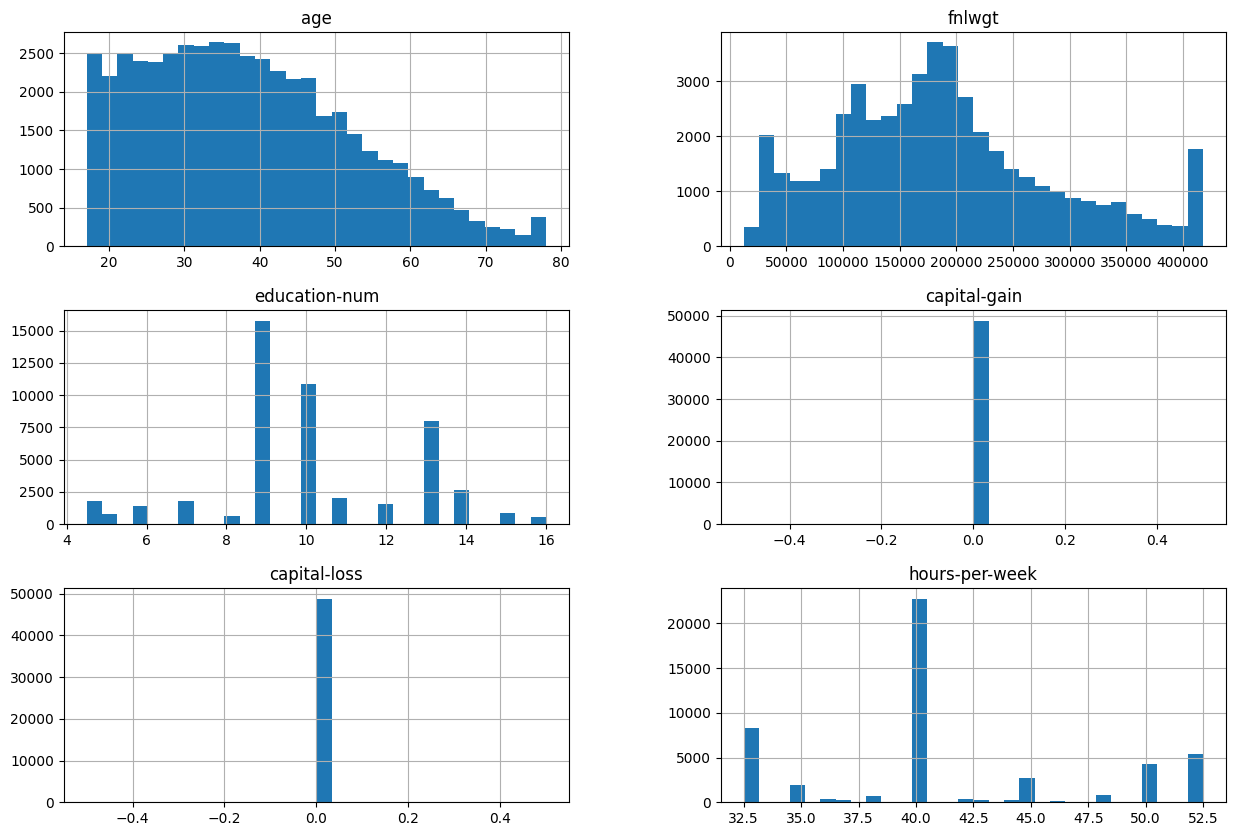

In [73]:
df_capped.hist(figsize=(15,10),bins=30)

The age and education levels are well-distributed.
The capital-gain and capital-loss features are highly imbalanced and may need transformation.
Hours worked per week shows a strong concentration at 40 hours, indicating many individuals work full-time

**KDE Plots**

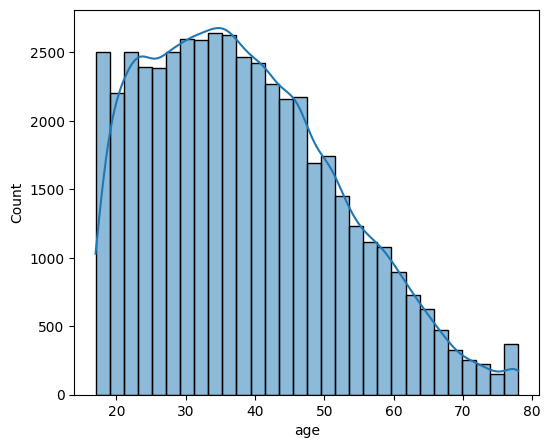

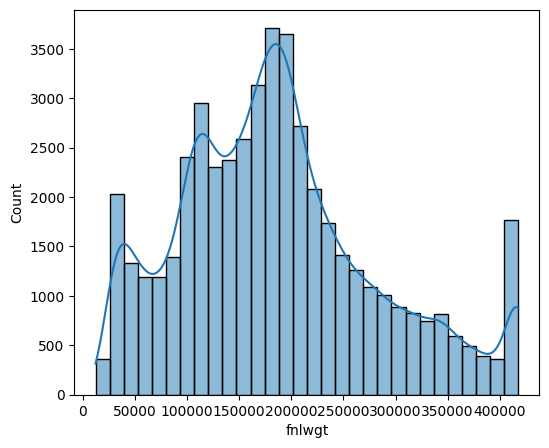

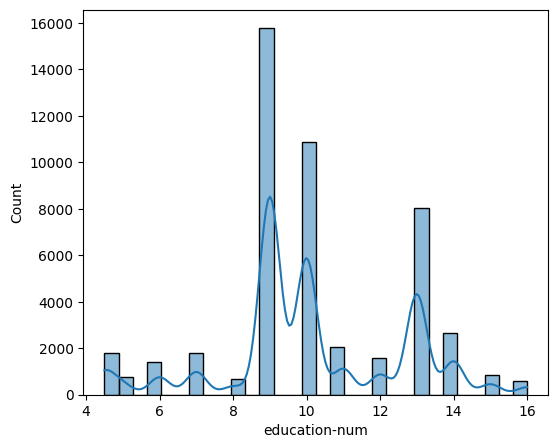

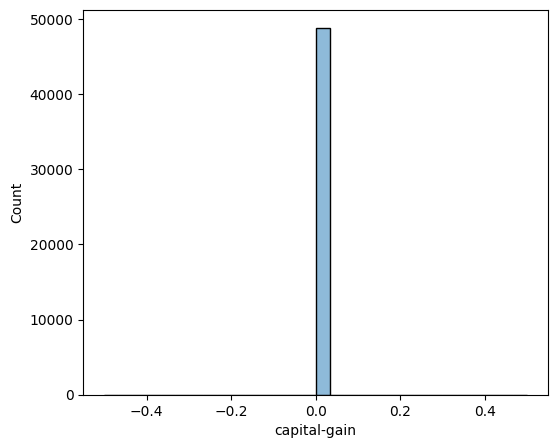

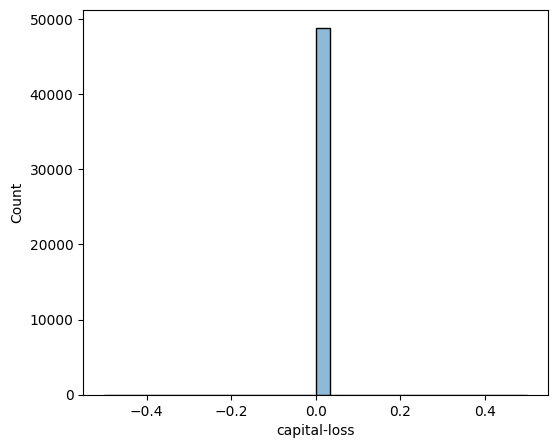

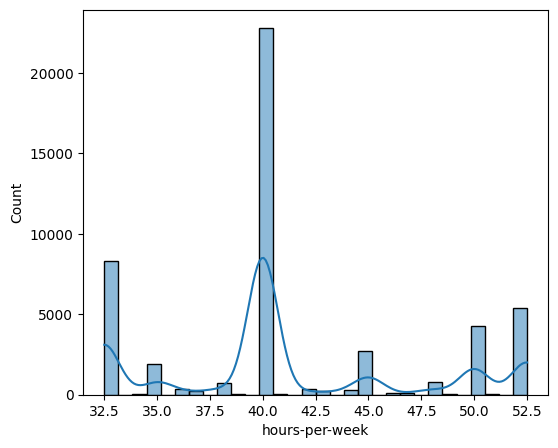

In [74]:
for col in num_cols:
  plt.figure(figsize=(6,5))
  sns.histplot(df_capped[col],kde=True,bins=30)
  plt.show()

**Pie Chart**

([<matplotlib.patches.Wedge at 0x7fc911a16f50>,
 [Text(-0.751445966571134, -0.8033236952337297, '<50K'),
  Text(0.7514457048150095, 0.803323940085862, '>50K')],
 [Text(-0.4098796181297094, -0.4381765610365798, '76.1%'),
  Text(0.4098794753536415, 0.43817669459228836, '23.9%')])

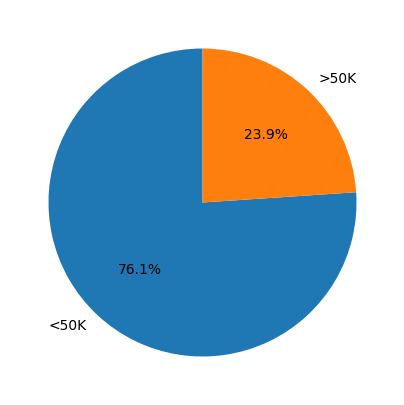

In [75]:
target_count = df_capped['income'].value_counts()
plt.figure(figsize=(5,5))
plt.pie(target_count, labels=target_count.index, autopct='%1.1f%%', startangle=90)

The above pie chart representing the classes of "income" columns and it shows that 76.1% of data represents peoples with income less than 50K dollars and remaining 23.9% represents the peoples with income greater than 50K dollars

**Count plot**

<ipython-input-76-eaaa34fc87e4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_capped,x="education",palette="viridis")


<Axes: xlabel='education', ylabel='count'>

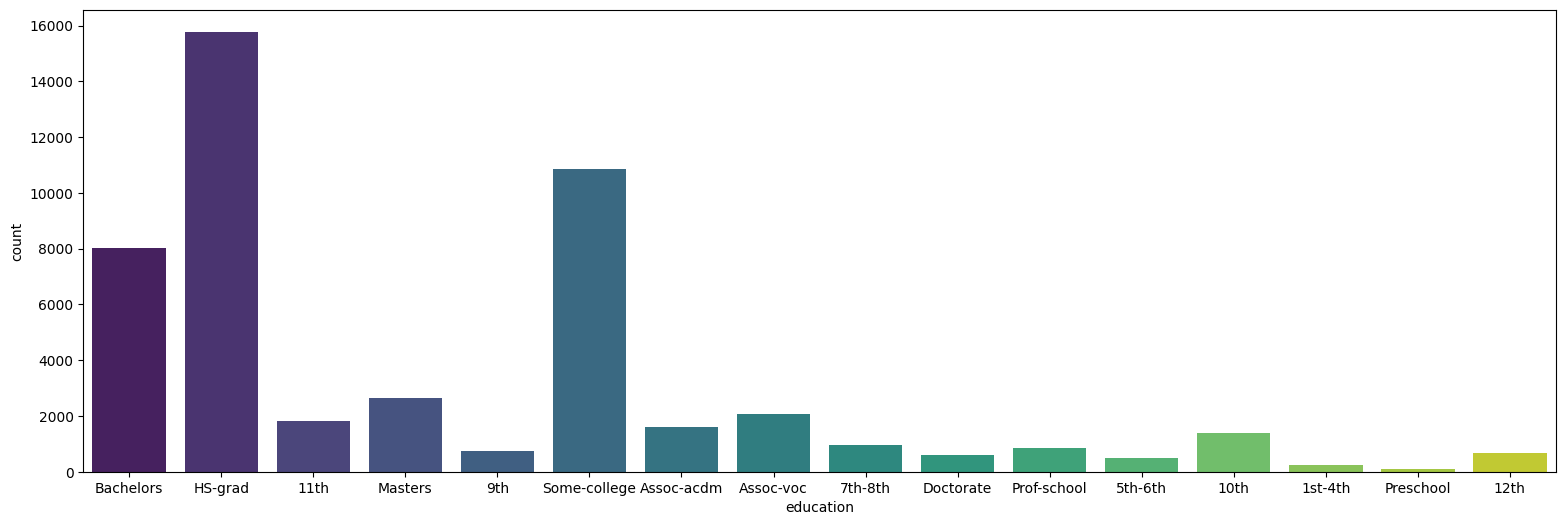

In [76]:
plt.figure(figsize=(19,6))
sns.countplot(data=df_capped,x="education",palette="viridis")

The above graph represent the count of unique class in the "education" column.And it shows that most of peoples educational qualification are HS-grad

<ipython-input-77-4f7d704957cd>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_capped,x="marital-status",palette="viridis")


<Axes: xlabel='marital-status', ylabel='count'>

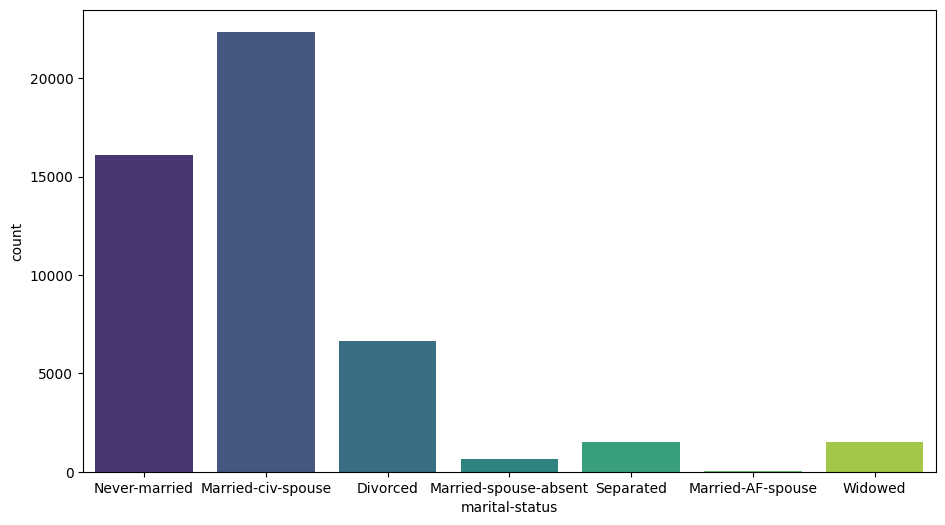

In [77]:
plt.figure(figsize=(11,6))
sns.countplot(data=df_capped,x="marital-status",palette="viridis")

The above graph represent the count of unique class in the "marital-status" column.It shows that most of people belongs to "Married-civ-spouse" class.

<ipython-input-78-6af1781bf8cc>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_capped,x="income",palette="viridis")


<Axes: xlabel='income', ylabel='count'>

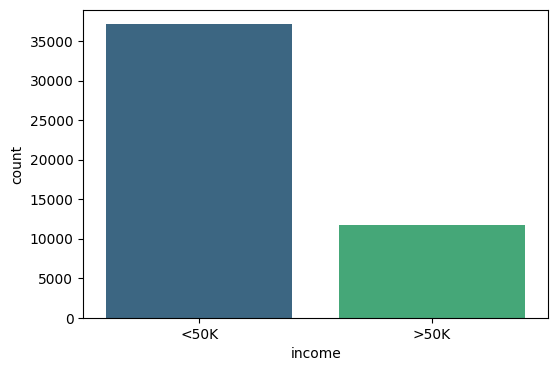

In [78]:
plt.figure(figsize=(6,4))
sns.countplot(data=df_capped,x="income",palette="viridis")

The above graph represent the count of unique class in the "income" column.This graph suggest that the income column is highly imbalanced and it tells that people with salary less than 50 dollars are in high number.So inorder to do the classification tasks we need to balance the column and we did it using "SMOTE" technique.

**Feature Encoding**

In [79]:
le = LabelEncoder()
df_capped['income'] = le.fit_transform(df_capped['income'])

In [80]:
df_capped["income"].tail(5)

,income
48837,0
48838,0
48839,0
48840,0
48841,1


**Data Balancing**

In [81]:
# Step 1: Separate the features (X) and target (y)
from imblearn.over_sampling import SMOTE
X = df_capped.drop('income', axis=1)
y = df_capped['income']
X = pd.get_dummies(X,drop_first=True)

# Step 2: Apply SMOTE first to balance the classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Step 3: Convert the resampled data back to a DataFrame
X_resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
y_resampled_df = pd.DataFrame(y_resampled, columns=['income'])

# Step 4: Combine the resampled features and target back into a single DataFrame
df_resampled = pd.concat([X_resampled_df, y_resampled_df], axis=1)

# Step 5: Check the new class distribution to ensure balance
df_resampled['income'].value_counts()

df_resampled

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income
0,39.000000,77516.000000,13.000000,0.0,0.0,40.000000,False,False,False,False,...,False,False,False,False,False,False,True,False,False,0
1,50.000000,83311.000000,13.000000,0.0,0.0,32.500000,False,False,False,False,...,False,False,False,False,False,False,True,False,False,0
2,38.000000,215646.000000,9.000000,0.0,0.0,40.000000,False,False,True,False,...,False,False,False,False,False,False,True,False,False,0
3,53.000000,234721.000000,7.000000,0.0,0.0,40.000000,False,False,True,False,...,False,False,False,False,False,False,True,False,False,0
4,28.000000,338409.000000,13.000000,0.0,0.0,40.000000,False,False,True,False,...,False,False,False,False,False,False,False,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74251,39.853817,233837.366541,11.097455,0.0,0.0,45.243638,True,False,False,False,...,False,False,False,False,False,False,True,False,False,1
74252,56.655754,314151.623016,14.032738,0.0,0.0,51.639385,False,False,True,False,...,False,False,False,False,False,False,True,False,False,1
74253,42.687709,46382.877088,13.421927,0.0,0.0,44.093019,False,False,True,False,...,False,False,False,False,False,False,True,False,False,1
74254,30.101703,72887.000000,9.186444,0.0,0.0,40.000000,False,False,True,False,...,False,False,False,False,False,False,True,False,False,1


Here we had did the Over-Sampling technique to make the data balanced and also we applied the get_dummies function to encode the columns.

In [82]:
df_resampled["income"].value_counts()

,count
income,
0,37128
1,37128


Above we rechacked the value counts of income column.

 # 7.Feature Selection

In [83]:
selector = SelectKBest(score_func=f_classif, k=15) # Select top 15features
X_new = selector.fit_transform(X_resampled_df, y_resampled_df)

# Get the selected feature's names
selected_feature_indices = selector.get_support(indices=True)
selected_features = X_resampled_df.columns[selected_feature_indices]

print("Selected Features:", selected_features)

# Create a new DataFrame with selected features
X_selected = X_resampled_df[selected_features]

Selected Features: Index(['age', 'education-num', 'hours-per-week', 'workclass_Self-emp-inc',
       'education_Bachelors', 'education_Masters', 'education_Prof-school',
       'marital-status_Married-civ-spouse', 'marital-status_Never-married',
       'occupation_Exec-managerial', 'occupation_Prof-specialty',
       'relationship_Own-child', 'relationship_Wife', 'race_White',
       'sex_Male'],
      dtype='object')


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [3 4] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


We used SelectKBest to select the top 15 features of the resampled dataframe and created a new dataframe, X_selected.


#8. Split Data into Training and Testing Sets


In [84]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y_resampled_df, test_size=0.2)
y_test=y_test.values.ravel()

**Standard Scaling**

In [85]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

We used standard scaler to normalize features by removing the mean and scaling to unit variance.This ensures that all features contribute equally to the model.

# 9. Build the ML Model:

In [86]:
# Create a dictionary of models
models = {
    "Lr": LogisticRegression(),
    "Svm": SVC(),
    "Dt": DecisionTreeClassifier(),
    "Rf": RandomForestClassifier(),
    "Gb": GradientBoostingClassifier()
}

# Train and evaluate each model
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train.values.ravel())
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy}")


Training Lr...


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Lr Accuracy: 0.8435227578777269
Training Svm...
Svm Accuracy: 0.8516024777807703
Training Dt...
Dt Accuracy: 0.8574602747104767
Training Rf...
Rf Accuracy: 0.8692431995690816
Training Gb...
Gb Accuracy: 0.8775922434688931


Above we trained 5 models an we found that the Gradient boosting model has the high accuracy.


# 10.Model Evaluation

Model: Lr
Accuracy: 0.8435227578777269
Precision: 0.8442868830106354
Recall: 0.8397070789259561
F1 Score: 0.8419907533315203


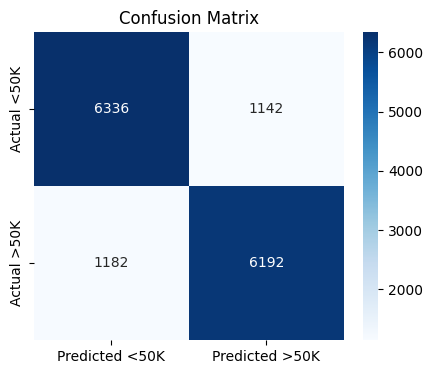

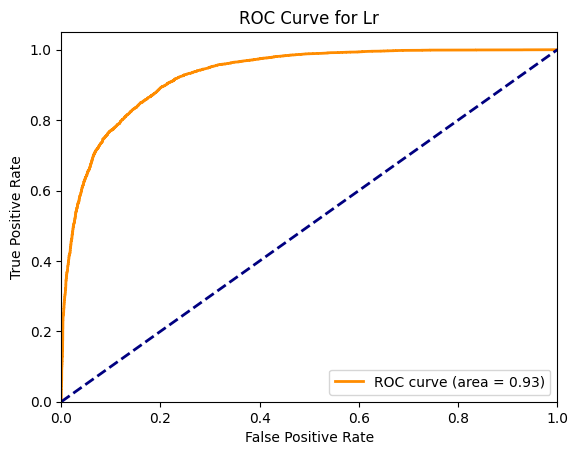

------------------------------
Model: Svm
Accuracy: 0.8516024777807703
Precision: 0.8130297892952288
Recall: 0.9104963384865744
F1 Score: 0.859007164790174


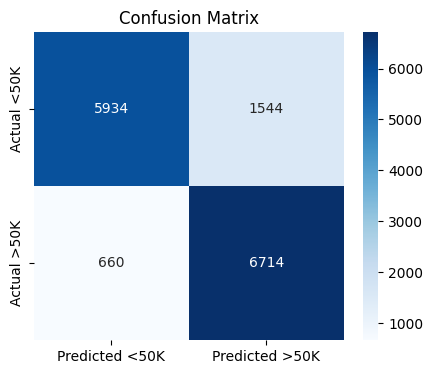

ROC curve not available for Svm (predict_proba not available)
------------------------------
Model: Dt
Accuracy: 0.8574602747104767
Precision: 0.8785827452110039
Recall: 0.8272308109574179
F1 Score: 0.8521338269190473


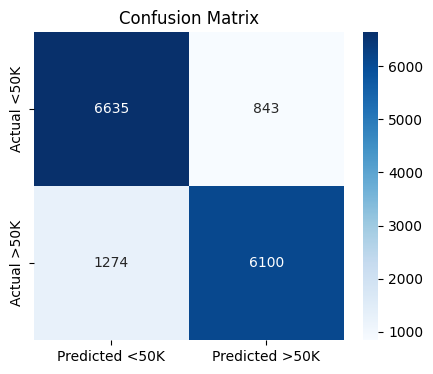

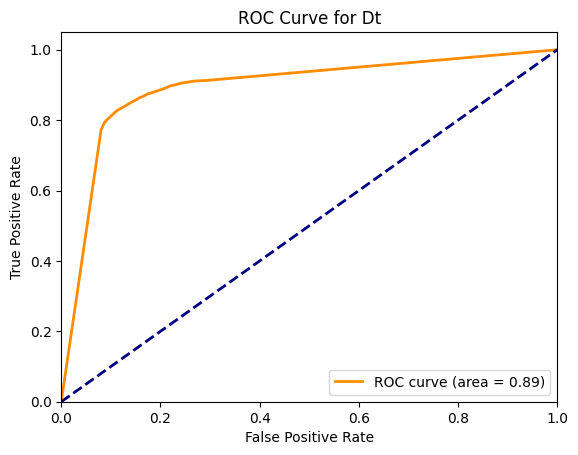

------------------------------
Model: Rf
Accuracy: 0.8692431995690816
Precision: 0.881139489194499
Recall: 0.8515052888527258
F1 Score: 0.8660689655172413


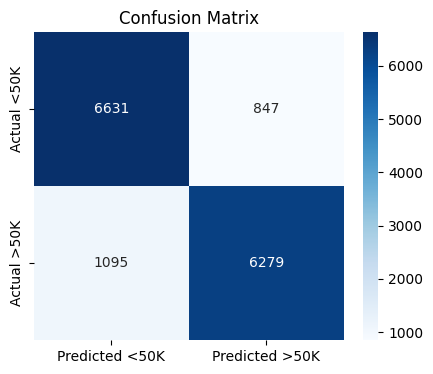

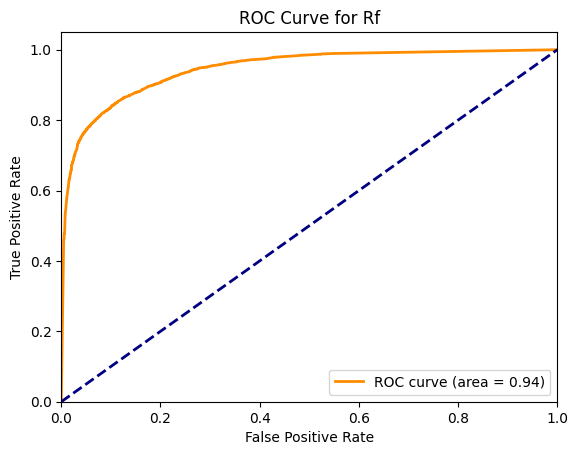

------------------------------
Model: Gb
Accuracy: 0.8775922434688931
Precision: 0.8744944729037476
Recall: 0.8797125033902902
F1 Score: 0.8770957274202271


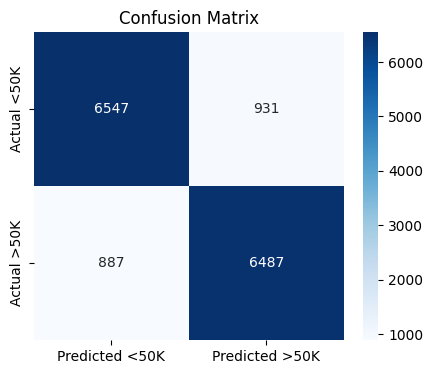

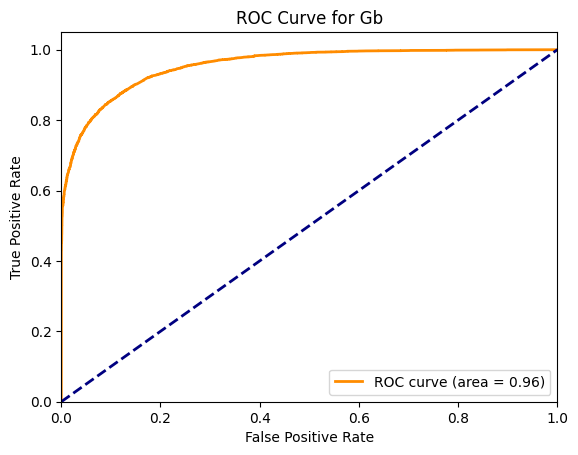

------------------------------


In [88]:

for name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"Model: {name}")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
    xticklabels=["Predicted <50K", "Predicted >50K"],
    yticklabels=["Actual <50K", "Actual >50K"])
    plt.title("Confusion Matrix")
    plt.show()

    # ROC Curve and AUC (only for models that provide probability estimates)
    if hasattr(model, "predict_proba"):
      y_prob = model.predict_proba(X_test)[:, 1]
      fpr, tpr, thresholds = roc_curve(y_test, y_prob)
      roc_auc = auc(fpr, tpr)

      plt.figure()
      plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
      plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
      plt.xlim([0.0, 1.0])
      plt.ylim([0.0, 1.05])
      plt.xlabel('False Positive Rate')
      plt.ylabel('True Positive Rate')
      plt.title(f'ROC Curve for {name}')
      plt.legend(loc="lower right")
      plt.show()
    else:
      print(f"ROC curve not available for {name} (predict_proba not available)")
    print("-" * 30)

**Classification Report**

In [90]:

for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"Classification Report for {name}:")
    print(classification_report(y_test, y_pred))
    print("-" * 30)


Classification Report for Lr:
              precision    recall  f1-score   support

           0       0.84      0.85      0.85      7478
           1       0.84      0.84      0.84      7374

    accuracy                           0.84     14852
   macro avg       0.84      0.84      0.84     14852
weighted avg       0.84      0.84      0.84     14852

------------------------------
Classification Report for Svm:
              precision    recall  f1-score   support

           0       0.90      0.79      0.84      7478
           1       0.81      0.91      0.86      7374

    accuracy                           0.85     14852
   macro avg       0.86      0.85      0.85     14852
weighted avg       0.86      0.85      0.85     14852

------------------------------
Classification Report for Dt:
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      7478
           1       0.88      0.83      0.85      7374

    accuracy                 

**Evaluation metrices DataFrame**

In [94]:
# Data extracted from the classification reports
data = {
    "Model": ["Logistic Regression", "SVM", "Decision Tree", "Random Forest", "Gradient Boosting"],
    "Precision (Class 0)": [0.84, 0.90, 0.84, 0.86, 0.88],
    "Recall (Class 0)": [0.85, 0.79, 0.89, 0.89, 0.88],
    "F1-Score (Class 0)": [0.85, 0.84, 0.86, 0.87, 0.88],
    "Precision (Class 1)": [0.84, 0.81, 0.88, 0.88, 0.87],
    "Recall (Class 1)": [0.84, 0.91, 0.83, 0.85, 0.88],
    "F1-Score (Class 1)": [0.84, 0.86, 0.85, 0.87, 0.88],
    "Accuracy": [0.84, 0.85, 0.86, 0.87, 0.88],
    "Macro Avg F1": [0.84, 0.85, 0.86, 0.87, 0.88],
    "Weighted Avg F1": [0.84, 0.85, 0.86, 0.87, 0.88]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Optionally, save as CSV
df.to_csv("classification_results.csv", index=False)
df

,Model,Precision (Class 0),Recall (Class 0),F1-Score (Class 0),Precision (Class 1),Recall (Class 1),F1-Score (Class 1),Accuracy,Macro Avg F1,Weighted Avg F1
0,Logistic Regression,0.84,0.85,0.85,0.84,0.84,0.84,0.84,0.84,0.84
1,SVM,0.90,0.79,0.84,0.81,0.91,0.86,0.85,0.85,0.85
2,Decision Tree,0.84,0.89,0.86,0.88,0.83,0.85,0.86,0.86,0.86
3,Random Forest,0.86,0.89,0.87,0.88,0.85,0.87,0.87,0.87,0.87
4,Gradient Boosting,0.88,0.88,0.88,0.87,0.88,0.88,0.88,0.88,0.88


# 11.Hyperparameter Tuning

In [ ]:

# Define the Gradient Boosting model
gb = GradientBoostingClassifier()

# Define the parameter grid for tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0]
}

# Set up the GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=gb, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Display the best parameters found
print("Best Parameters:", grid_search.best_params_)



Fitting 5 folds for each of 81 candidates, totalling 405 fits


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 1.0}


**Building Best model with the selected parameters**

In [98]:
gb = GradientBoostingClassifier(n_estimators=200,learning_rate=0.1,max_depth=5,subsample=1.0,random_state=42)
gb.fit(X_train, y_train.values.ravel())

GradientBoostingClassifier(max_depth=5, n_estimators=200, random_state=42)

In [99]:
y_pred = gb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100}%")

Accuracy: 88.7018583355777%


Once again we train the Gradient Boosting model with the best parameters for decent performance and accuracy.

#12.Save The Model

In [100]:
# Save the fitted model to a file
file= open('My_Model.pkl', 'wb')
pickle.dump(gb,file)

print("Classifier saved successfully.")

Classifier saved successfully.


# 13.Pipeline Making

In [102]:
# Identify numerical and categorical features from X_selected
num_features = X_selected.select_dtypes(include=['int64', 'float64']).columns
cat_features = X_selected.select_dtypes(include=['object']).columns

# Create preprocessing steps using selected features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)],
    remainder='passthrough'  # Handle remaining columns
)

# Define pipeline with the updated preprocessor
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', gb)  # Assuming best_gb is your best model
])

# Fit the pipeline
pipeline.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  Index(['age', 'education-num', 'hours-per-week'], dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index([], dtype='object'))])),
                ('classifier',
                 GradientBoostingClassifier(max_depth=5, n_estimators=200,
                                            random_state=42))])

**Saving the Pipeline**

In [103]:
joblib.dump(pipeline, 'pipeline.joblib')

['pipeline.joblib']

In [104]:
loaded_pipeline = joblib.load('pipeline.joblib')

#14.Test with Unseen Data

In [105]:
# Creating an unseen test dataset

unseen_data = pd.DataFrame({
    'age': [37, 50, 29, 41, 55],
    'workclass': ['Private', 'Self-emp-not-inc', 'State-gov', 'Federal-gov', 'Private'],
    'fnlwgt': [215646, 193524, 118372, 154374, 210987],
    'education': ['Bachelors', 'Masters', 'Assoc-acdm', 'HS-grad', 'Doctorate'],
    'education-num': [13, 14, 12, 9, 16],
    'marital-status': ['Married-civ-spouse', 'Divorced', 'Never-married', 'Separated', 'Widowed'],
    'occupation': ['Exec-managerial', 'Sales', 'Prof-specialty', 'Tech-support', 'Craft-repair'],
    'relationship': ['Husband', 'Not-in-family', 'Own-child', 'Unmarried', 'Wife'],
    'race': ['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'White'],
    'sex': ['Male', 'Female', 'Male', 'Female', 'Male'],
    'capital-gain': [0, 5000, 0, 2000, 10000],
    'capital-loss': [0, 0, 1000, 500, 0],
    'hours-per-week': [40, 60, 30, 20, 50],
    'native-country': ['United-States', 'India', 'Canada', 'Mexico', 'Germany'],
})

unseen_data


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,37,Private,215646,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States
1,50,Self-emp-not-inc,193524,Masters,14,Divorced,Sales,Not-in-family,Black,Female,5000,0,60,India
2,29,State-gov,118372,Assoc-acdm,12,Never-married,Prof-specialty,Own-child,Asian-Pac-Islander,Male,0,1000,30,Canada
3,41,Federal-gov,154374,HS-grad,9,Separated,Tech-support,Unmarried,Amer-Indian-Eskimo,Female,2000,500,20,Mexico
4,55,Private,210987,Doctorate,16,Widowed,Craft-repair,Wife,White,Male,10000,0,50,Germany


Above we created an unseen dataset having 5 rows by giving random values which is not in the training dataset.



In [106]:
y_pred = loaded_pipeline.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
# Display accuracy on the test set
print("Accuracy on the test set:", accuracy*100)

Accuracy on the test set: 88.7018583355777


Above we found the testing accuracy of the model we saved and we found that there is no difference with training accuracy.

# 15.Interpretation of Results (Conclusion):

The model trained on the UCI Adult Dataset achieved a training accuracy of 88.7% and a testing accuracy of 88.7%, indicating good performance in predicting income levels. Since there is no difference in accuracy so the model has no underfitting or overfitting.

This means the model performs consistently well on unseen data, making it reliable for real-world predictions.

Overall, the model is well-balanced and effective, with no major signs of underfitting or overfitting.

The UCI Adult dataset, while widely used for classification tasks, has some inherent limitations. It is based on the 1994 U.S. Census, meaning it may not fully represent current socio-economic conditions. Additionally, the dataset may contain biases in gender, race, and income distribution, potentially affecting model fairness. Another limitation is that the dataset lacks certain important features, such as detailed work experience, promotions, or evolving salaries over time, which could improve income prediction. Furthermore, class imbalance exists in the dataset, with a higher proportion of individuals earning ≤50K, which might cause the model to favor the majority class.

In conclusion, The UCI Adult dataset remains a useful benchmark for income prediction, but care must be taken to interpret results fairly, considering its biases. With better feature engineering, regularization, and data balancing, the model could achieve even higher accuracy and better generalization.

#16.Future Work


Exploring deep learning algorithms, such as neural networks, may improve accuracy by capturing complex patterns in the data.

Periodically updating the model with new data can help maintain its relevance and improve performance over time.

Addressing imbalanced data using techniques like oversampling, undersampling, or SMOTE can prevent bias toward the majority class.

Adding more relevant features, such as job tenure, industry type, or economic factors, could enhance the model's predictive power and generalization ability.